# NLP Internship Assignment | Hypothizer

### P1. How do you approach the problem of finding similarity between any two clusters of text? Please explain with logic?
 

As the documents with similar context tends to have similar words.
For the task of finding similarity between any two text clusters, first we have to convert the text into a more suitable representation like vectors (if not already converted) so that we can apply mathematical operations or measurements to our text documents/clusters. And then apply some metric too measure the similarity or distance between the vectors.

Here I describe my approach to the problem of finding similarity b/w any 2 clusters of text in the following 5 steps.

**Step 1: Preprocessing** - The unprocessed or raw text contains many unwanted structures or elements which provides no extra information about our documents and make our task more cumbersome and noisy.
    
   >**1.1 Remove stop words** - Stop words like a, the, is, are are the most frequent words in any documents but they do not contribute to any deeper meaning of the phrase. So, it is better if we remove these words.

    >**1.2 Stemming** - It was found that various morphological variations of words often have a similar meaning. So, we should reduce these types of words to their root word. Example - "stems", "stemmer", "stemming", "stemmed" reduced to root "stem".

    >**1.3 Removing infrequent words** - Infrequent words contribute a little to the similarity of the documents an produces noise in our data. So, it is better if we set a threshold and if a word appears less then that threshold time then we remove it.

    >**1.4 Convert the documents to the same length** - Here we normalize our documents to the same length (often by adding paddings) so that large text documents in the cluster could not dominate the smaller one.
.

.


** Step 2: Bag-Of-Word **- Once we are done with preprocessing, we apply the method like Bag-Of-Word to the text documents. BOW model converts each text document into a vector representation where each word in the vocabulary represents a unique dimension of that vector.

>**Example:**
>For vocabulary - it, was, the, best, of, times, worst, age, wisdom, foolishness

>The vector for document "it was the worst of times" is - [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]

The logic behind is that the machine learning algorithms cannot work with raw text data and it needs to be converted to a more suitable representation of numbers. We can combine BOW with a scoring method like TF-IDF (Term Frequency- Inverse Document Frequency) in which the frequent words that are also frequent across all documents are penalized (assigned low weight). In this way, the common words which are non-descriptive for the topic of a document can be ignored.

The output from this step is weighted term vector.

**(Here, instead of BOW model we can also use Word embedding)**

.

.

**Step 3: Selecting a measure** -Now we have to define a metric to measure the similarity or distance between the vector representation of our documents.

There are several measures available for that and the effectiveness of these measures are completely dependent on the task in our hand and the algorithm used to cluster the objects.

Few of the measures are:

>**3.1 Cosine Similarity** - As the documents are being changed into vectors the similarity between those vectors resembles the correlation between them.
    The correlation between 2 vectors can be found mathematically by taking the cosine of the angle between them. The result is bounded between [0, 1] and it is 1 when the 2 vectors are identical.

    >**3.2 Euclidean Distance** - Euclidean distance is simply the distance between two points and the concept can be extended to two or more dimensions. The less is the distance between two vectors the more similar the vectors are.

    >**3.3 Pearson Correlation Coefficient** - Pearson Correlation Coefficient is another measure for the similarity between 2 vectors. The result ranges from -1 to +1, 1 when 2 documents are identical and -1 when there is no similarity between them.


.

.

**Step 4: Selecting a representative Vector** - Now we have to select a representative vector for our cluster. For example in clustering algorithm like K-means, the cluster is represented by the centroid object. 


.

.

**Step 5: Measuring the similarity** - Finally we measure the similarity/distance between the vectors of the clusters using our chosen metric.

(We can further use this approach to find Within cluster similarity/distance.)


.

.


.

.


###  P2. How do you approach sentence level correction? using language modeling or any other methods? Please explain with logic?


**We can approach the problem of sentence-level correction in 2 ways:**
1. Using language modeling technique.
2. Using Encoder-Decoder neural network with Attention.




**1. Using language modeling technique**


The problem with natural languages is that there is no formal specification. There are rules for parts of the language but they are used very rarely. There are a large number of terms in NL that can be used in many different ways. 

Language modeling is the development of a probabilistic model which can give us the probability of occurrence of a word given the preceding words. 

Neural networks can be used in the development of the language models as Neural network models have more ability to generalize than the linear models and they allow conditioning on the large context sizes and then the language modeling is called neural network language modeling.



**Step 1. Data collection** -  First we have to collect some error-free data. It is good for our model if we collect similar data for which we want to build the language model.

**Step 2. Cleaning** - We have to clean the collected data by removing unwanted punctuations and other elements to minimize the size of our vocabulary.

**Step 3. Modelling the data** - For the task of language modeling, we want our model to predict the probability of occurrence of a word given preceding words and then we fed that word again as the input to get next word. For that, we have to make our data suitable for this task by slicing it down into input sequences of some predefined length and unit length output (if we want to predict one word).

>**Example** - We can covert long text into sequences of 20 input words and 1 output word.

**Step 4. Tokenize the documents** - Train the tokenizer on the entire dataset which finds all the unique words in the dataset and assign them to the unique integers. These integers can be considered as the index of words and we can easily map those integers to their corresponding words later.

**Step 5. Input and output sequences** - Now we convert text sequence into X(input) and Y(output) elements.
Input sequence can be created easily with slicing, but we have to one-hot-code the output Y such that the size of output vector is equal to the size of vocabulary with all "0" except one "1" whose index maps the next word of the input sequence.

**Step 6. Define and fit the model** - In this step, we define the model and fit it to the error-free data. In this way our model learn to represent the patterns in the text.

Following layers with the combination of several other layers can be used:

Embedding Layer - As text is not a suitable format to pass as input to an ML model, we create word embedding distributed vector representation of our text.
 
Long short-term memory - These layer contains memory units and allow the model to learn the relevant context over much longer input sequences. More memory cells and a deeper network may achieve better results.

Dense layer  - One or more dense layer should be used to interpret the features extracted from the sequence. And the last layer must be a dense layer with the size equals to the size of vocabulary and "softmax" as the activation function. The reason behind using softmax activation is that it gives the probability of the classes as output.

**Step 7.** Finally, we fed the erroneous data to our model and check that if the next word resembles the suggestion of our model. If not, we can replace the erroneous word with the word suggested by the model.

.



.




**2. Using Encoder-Decoder neural network with Attention**

Encoder-Decoder models found its application in various sequence-to-sequence prediction tasks like machine translation. Our problem of sentence-level correction can be modeled as a problem for translating the erroneous sentences to the correct once and then various machine translation methods can be applied to the problem.

It is really helpful for our problem if we apply the advantages of attention mechanism to improve the performance of the encoder-decoder model for long sequences. 



.

.

.

.


## P3. Coding Problem : (please explain your solution and write code in any language preferably - c/c++/python ) Longest Path in a Directed Acyclic Graph


## 1. Creating a class for graph

**As name suggest, a directed ayclic graph is a graph with no cycles. For this problem we assume that a graph is already a DAG**

In [429]:
'''Here we start by ceating a Node first
Fields includes a value and the information about edges
A flag Visited which tell if we visited the node during the search or not'''

class Node(object):
    def __init__(self, value):
        self.value = value
        self.edges = []
        self.visited = False

In [430]:
'''Class for creating edges
The object contains a value and the informaion of the incoming 
and the outgoing edge from the node'''

class Edge(object):
    def __init__(self, value, node_from, node_to):
        self.value = value
        self.node_from = node_from
        self.node_to = node_to

In [473]:
''' Graph class with constructor initialize 
    with the informationof nodes and edges 
    (list of nodes and edges)'''
class Graph(object):
    def __init__(self, nodes=None, edges=None):
        self.nodes = nodes or []
        self.edges = edges or []

        
    #Function to inster the new node in the graph
    def insert_node(self, new_node_val):
        new_node = Node(new_node_val)
        self.nodes.append(new_node)
    
    
    #Function to insert a new edge to the graph
    def insert_edge(self, new_edge_val, node_from_val, node_to_val):
        from_found = None
        to_found = None
        for node in self.nodes:
            if node_from_val == node.value:
                from_found = node
            if node_to_val == node.value:
                to_found = node
        if from_found == None:
            from_found = Node(node_from_val)
            self.nodes.append(from_found)
        if to_found == None:
            to_found = Node(node_to_val)
            self.nodes.append(to_found)
        new_edge = Edge(new_edge_val, from_found, to_found)
        from_found.edges.append(new_edge)
        to_found.edges.append(new_edge)
        self.edges.append(new_edge)
    
    
    
    ''' Function to return the list of edges in the graph
        Return a list of triples like this:
        From node value, to node value'''
    def get_edge_list(self):
        edge_list = []
        for edge_object in self.edges:
            edge = (edge_object.node_from.value, edge_object.node_to.value)
            edge_list.append(edge)
        return edge_list



    
    # finding the max index
    def find_max_index(self):
        max_index = -1
        if len(self.nodes):
            for node in self.nodes:
                if node.value > max_index:
                    max_index = node.value
        return max_index

## 2. Function for Depth First Search



### After Creating the DAG we define a function for Depth First Search which will return a list of nodes it encounter while performing the search.

In [432]:
#Function return a path for Depth first search
def Depth_first_search(graph,current,visited,cpath):
    npath = [] #new path
    for node in graph[current]:
        if node not in visited:
            visited.append(node)
            tpath = cpath + [node] #tmp path
            npath.append(tpath)    #append to existing path
            #extend current path
            npath.extend(Depth_first_search(graph,node,visited,tpath))
    return npath


## 3. Function for Findfing Longest path 

### Now we define a function which takes source and graph name as input and return all the paths + the longest path

In [443]:
from collections import defaultdict

def longest_path(source,graph_name):
    edges_list  = graph_name.get_edge_list()

    #Converting edges in an directed graph to adjacency list
    graph = defaultdict(list) #dictionary of lists
    for (s,t) in edges_list:
        graph[s].append(t)

        
        
    visited = [source]
    path = [source]
    result  = Depth_first_search(graph,source,visited,path)
        
    print"Paths from the source node:",result
    result.sort(key=len,reverse=True)
    print("Longest path:", result[0])
    

**The idea is that the function Depth_first_search() give us all the path it encounter while performing the search from source node and then we return the longest path among those path.**

.

.

.

.

.
## Test

**For the D.A.G below, the longest path is:**

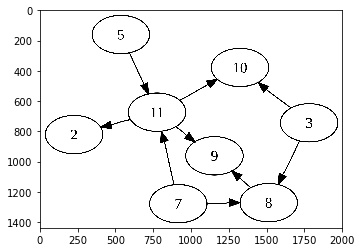

In [492]:
plt.show()

In [486]:
dag = Graph()
dag.insert_edge(0,5,11)
dag.insert_edge(0,11,2)
dag.insert_edge(0,11,10)
dag.insert_edge(0,11,9)
dag.insert_edge(0,7,11)
dag.insert_edge(0,7,8)
dag.insert_edge(0,8,9)
dag.insert_edge(0,3,8)
dag.insert_edge(0,3,10)

In [487]:
longest_path(5,dag5)

Paths from the source node: [[5, 11], [5, 11, 2], [5, 11, 10], [5, 11, 9]]
('Longest path:', [5, 11, 2])


.

.

.

## Submitted by:-
### Girish Sharma
### (+91)9997762035
### girishsharma001@gmail.com